In [44]:
import pandas as pd
import hvplot.pandas
from pathlib import Path
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import numpy as np

## Reading & Normalizing Data

In [9]:

def minMaxScale(df):
    columns = ['High','Low','Volume']
    min_max_scaler = preprocessing.MinMaxScaler()
    normDf = df.copy()
    normDf[columns] = pd.DataFrame(min_max_scaler.fit_transform(normDf[columns]))
    return normDf



def readStock(filename):
    basePath = "/Users/shreya/dev/PROJECT_1/Finance_group_project/Resources/Healthcare/"
    filePath = basePath+filename
    df = pd.read_csv(filePath).dropna()
    df['Date'] = pd.to_datetime(df['Date'])
    df1 = df[['Date','High','Low','Volume']]
    

    return minMaxScale(df1)



In [11]:
ABBV_Df = readStock("ABBV.csv")
AMN_Df= readStock("AMN.csv")
DHC_Df= readStock("DHC.csv")
GILD_Df= readStock("GILD.csv")
GSK_Df= readStock("GSK.csv")
HCA_Df= readStock("HCA.csv")
JNJ_Df= readStock("JNJ.csv")
OHI_Df= readStock("OHI.csv")
SNY_Df = readStock("SNY.csv")
TAK_Df= readStock("TAK.csv")

In [12]:
ABBV_Df.head(10)

,Date,High,Low,Volume
0,2013-01-22,0.011971,0.006691,0.118910
1,2013-01-23,0.016175,0.010837,0.079127
2,2013-01-24,0.021020,0.016147,0.081974
3,2013-01-25,0.016175,0.011855,0.062260
4,2013-01-28,0.016389,0.012365,0.047474
5,2013-01-29,0.013467,0.009019,0.061468
6,2013-01-30,0.013966,0.013092,0.077975
7,2013-01-31,0.009691,0.009164,0.076977
8,2013-02-01,0.011615,0.010983,0.067146
9,2013-02-04,0.012327,0.011201,0.040947


## Concating the Companies 

In [14]:
Healthcare_df = pd.concat([ABBV_Df,
AMN_Df,
DHC_Df,
GILD_Df,
GSK_Df,
HCA_Df,
JNJ_Df,
OHI_Df,
SNY_Df,
TAK_Df])

In [15]:
Healthcare_df.head(10)

,Date,High,Low,Volume
0,2013-01-22,0.011971,0.006691,0.118910
1,2013-01-23,0.016175,0.010837,0.079127
2,2013-01-24,0.021020,0.016147,0.081974
3,2013-01-25,0.016175,0.011855,0.062260
4,2013-01-28,0.016389,0.012365,0.047474
5,2013-01-29,0.013467,0.009019,0.061468
6,2013-01-30,0.013966,0.013092,0.077975
7,2013-01-31,0.009691,0.009164,0.076977
8,2013-02-01,0.011615,0.010983,0.067146
9,2013-02-04,0.012327,0.011201,0.040947


In [16]:
Healthcare_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25180 entries, 0 to 2517
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    25180 non-null  datetime64[ns]
 1   High    25180 non-null  float64       
 2   Low     25180 non-null  float64       
 3   Volume  25180 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 983.6 KB


In [17]:
Healthcare_df.describe()

,High,Low,Volume
count,25180.000000,25180.000000,25180.000000
mean,0.443370,0.449285,0.070009
std,0.239576,0.242650,0.064985
min,0.000000,0.000000,0.000000
25%,0.251538,0.252119,0.030215
50%,0.431640,0.440732,0.054856
75%,0.620414,0.632096,0.090922
max,1.000000,1.000000,1.000000


In [18]:
Healthcare_df.head(10)

,Date,High,Low,Volume
0,2013-01-22,0.011971,0.006691,0.118910
1,2013-01-23,0.016175,0.010837,0.079127
2,2013-01-24,0.021020,0.016147,0.081974
3,2013-01-25,0.016175,0.011855,0.062260
4,2013-01-28,0.016389,0.012365,0.047474
5,2013-01-29,0.013467,0.009019,0.061468
6,2013-01-30,0.013966,0.013092,0.077975
7,2013-01-31,0.009691,0.009164,0.076977
8,2013-02-01,0.011615,0.010983,0.067146
9,2013-02-04,0.012327,0.011201,0.040947


## Average per Day of Data using groupby

In [19]:
df_Healthcare = Healthcare_df.groupby('Date')[['High','Low','Volume']].mean().dropna()

In [20]:
df_Healthcare

,High,Low,Volume
Date,,,
2013-01-22,0.289971,0.301999,0.069923
2013-01-23,0.288822,0.302162,0.077164
2013-01-24,0.293602,0.308121,0.058022
2013-01-25,0.299145,0.312959,0.062120
2013-01-28,0.302460,0.315661,0.046654
...,...,...,...
2023-01-13,0.541048,0.555125,0.081622
2023-01-17,0.548646,0.563097,0.082000
2023-01-18,0.542237,0.545361,0.103442


In [21]:
df_Healthcare.describe()

,High,Low,Volume
count,2518.000000,2518.000000,2518.000000
mean,0.443370,0.449285,0.070009
std,0.059931,0.061461,0.026636
min,0.236266,0.196971,0.010610
25%,0.402280,0.407705,0.052630
50%,0.438527,0.445366,0.064367
75%,0.485880,0.491655,0.081232
max,0.622931,0.629904,0.276095


## Ploting Graph Volume trading verse Date

(0.0, 0.7)

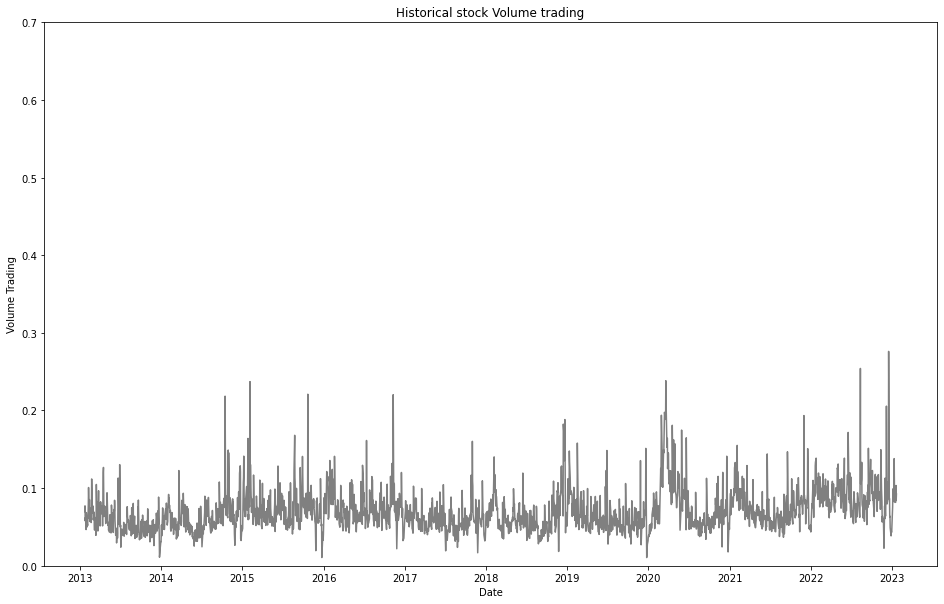

In [22]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.plot(df_Healthcare.Volume, color='grey', linestyle= '-')
ax.set(title = "Historical stock Volume trading",
       xlabel = "Date",
       ylabel = "Volume Trading")


plt.ylim(0, 0.7)




In [23]:
df_Healthcare.to_csv('Scaled_Data_Averaged.csv', encoding='utf-8')

In [24]:
Sorted_df = df_Healthcare.sort_values(by=['Date'])
Sorted_df

,High,Low,Volume
Date,,,
2013-01-22,0.289971,0.301999,0.069923
2013-01-23,0.288822,0.302162,0.077164
2013-01-24,0.293602,0.308121,0.058022
2013-01-25,0.299145,0.312959,0.062120
2013-01-28,0.302460,0.315661,0.046654
...,...,...,...
2023-01-13,0.541048,0.555125,0.081622
2023-01-17,0.548646,0.563097,0.082000
2023-01-18,0.542237,0.545361,0.103442


(0.0, 1.0)

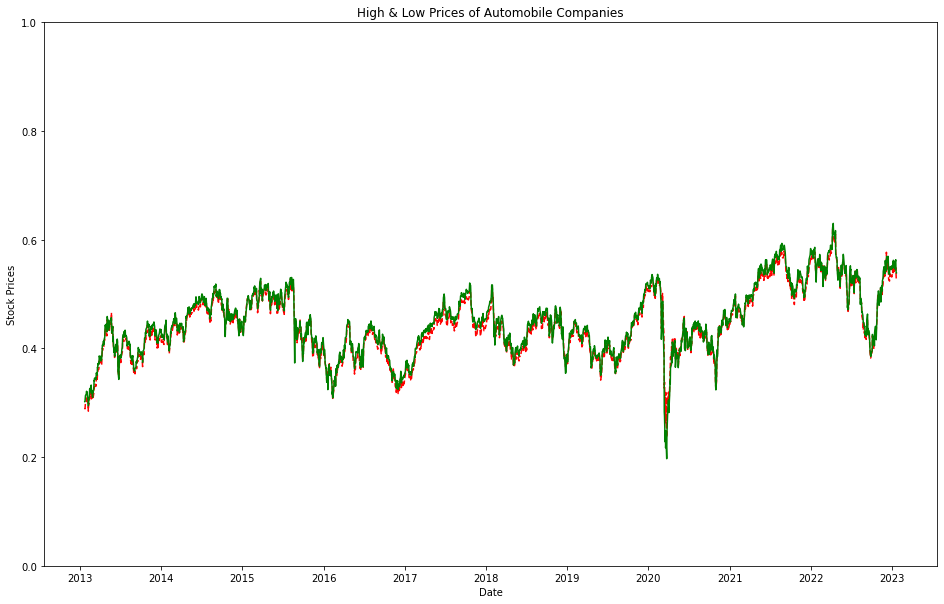

In [25]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.plot(Sorted_df.High, color='red', linestyle= '--')
ax.plot(Sorted_df.Low, color='green')
ax.set(title = "High & Low Prices of Automobile Companies",
       xlabel = "Date",
       ylabel = "Stock Prices")


plt.ylim(0, 1)



## MultiLinear Regression Machine Learning Model

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [51]:
train_df = Sorted_df[(Sorted_df.index < '2022-01-01')]
X_train = train_df[['High','Low']]
y_train = train_df['Volume']


test_df = Sorted_df[(Sorted_df.index >= '2022-01-01')]
X_test = test_df[['High', 'Low']]
y_test = test_df['Volume']

  
print("TRAIN")
print("Y train Shape: " + str(y_train.shape))
print("X train Shape: " + str(X_train.shape))

print("\nTEST")
print("Y test Shape: " + str(y_test.shape))
print("X test Shape: " + str(X_test.shape))

TRAIN
Y train Shape: (2254,)
X train Shape: (2254, 2)

TEST
Y test Shape: (264,)
X test Shape: (264, 2)


In [52]:
model = LinearRegression()

In [53]:
model.fit(X_train, y_train)

LinearRegression()

## Model Validation

In [54]:
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)


Intercept: 0.07481387053848708
Coefficients: [ 2.35040325 -2.33494159]


### Those values are the intercept and coefficients values of the models which can be put in mathematic equation as below:
### y=0.2162+4.2442X<sub>1</sub>-4.3192X<sub>2</sub>

In [55]:
r2 = model.score(X_train, y_train)
print("Model R2: " + str(r2))

Model R2: 0.4364532966027943


In [56]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [57]:

X = sm.add_constant(X_train) # adding a constant

olsmod = sm.OLS(y_train, X).fit()
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     871.7
Date:                Wed, 01 Feb 2023   Prob (F-statistic):          4.69e-281
Time:                        11:12:40   Log-Likelihood:                 5714.9
No. Observations:                2254   AIC:                        -1.142e+04
Df Residuals:                    2251   BIC:                        -1.141e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0748      0.003     22.856      0.0

In [58]:
print('R2 score:', olsmod.rsquared)

R2 score: 0.4364532966027943


### Accuracy Assesment
### R² range between 0 and 1, where R²=0 means there are no linear relationship between the variables and R²=1 shows a perfect linear relationship. In our case, we got R² score about 0.41 which means 41.1% of our dependent variable can be explained using our independent variables.

## Make Future Predictions 

In [59]:
print("\nTEST")
print("Y test Shape: " + str(y_test.shape))
print("X test Shape: " + str(X_test.shape))


TEST
Y test Shape: (264,)
X test Shape: (264, 2)


In [60]:
Predictions = model.predict(X_test)

print("prediction shape: " + str(Predictions.shape))

prediction shape: (264,)


In [61]:
Pred_df=pd.DataFrame( {"Prediction": Predictions, "Actual": y_test})
Sorted_pred_df =Pred_df.sort_values(by=['Date'])
Sorted_pred_df

,Prediction,Actual
Date,,
2022-01-03,0.064227,0.065624
2022-01-04,0.059824,0.076047
2022-01-05,0.072908,0.079808
2022-01-06,0.060178,0.074850
2022-01-07,0.061201,0.083426
...,...,...
2023-01-13,0.050310,0.081622
2023-01-17,0.049556,0.082000
2023-01-18,0.075904,0.103442


(0.0, 0.2)

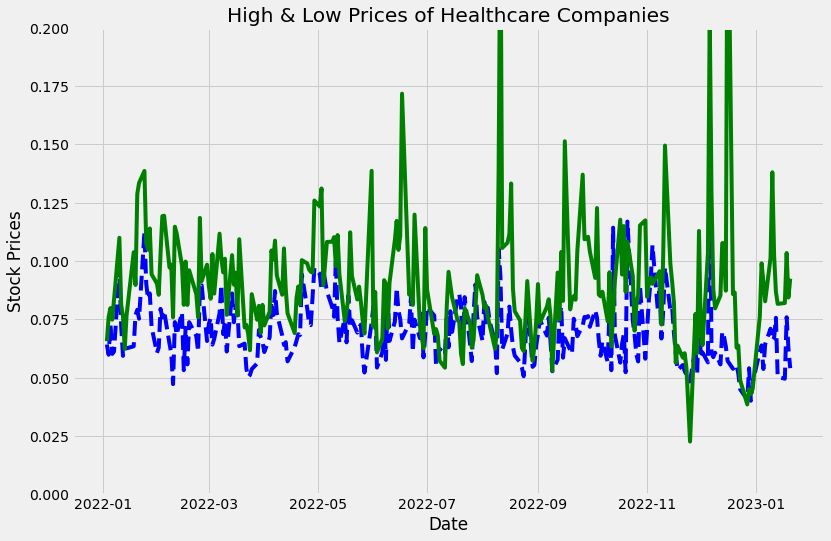

In [62]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(Sorted_pred_df.Prediction, color='blue', linestyle= '--')
ax.plot(Sorted_pred_df.Actual, color='green')
ax.set(title = "High & Low Prices of Healthcare Companies",
       xlabel = "Date",
       ylabel = "Stock Prices")


plt.ylim(0, 0.2)



(0.0, 0.2)

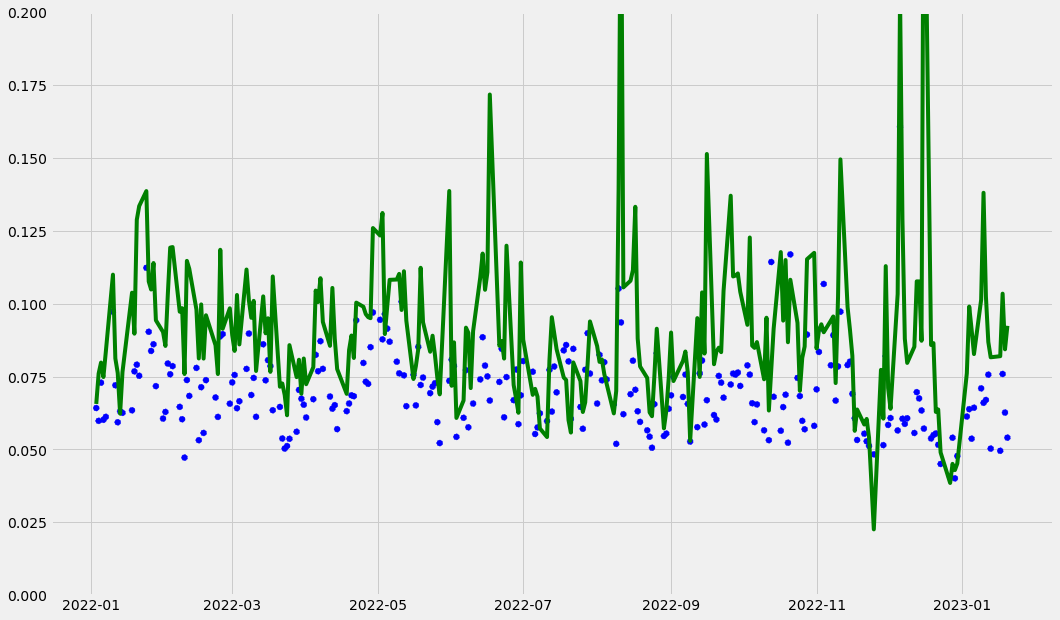

In [63]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.scatter(Sorted_pred_df.index,Sorted_pred_df.Prediction,color='blue', linestyle= '--')
ax.plot(Sorted_pred_df.Actual, color='green')
plt.ylim(0, 0.2)

In [68]:
r2 = model.score(X_test, y_test)

print("Prediction score: " + str(r2))

Prediction score: -0.35136549934414374


## 3D representation of the Multilinear Machine Learning Model

In [64]:
# Prepare data
X = df_Healthcare[['High', 'Low']].values.reshape(-1,2)
Y = df_Healthcare['Volume']

# Create range for each dimension
x = X[:, 0]
y = X[:, 1]
z = Y



xx_pred = np.linspace(0, 1,20)  # range of High  values

yy_pred = np.linspace(0,1,20)  # range of Low values
xx_pred, yy_pred = np.meshgrid(xx_pred, yy_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T



/Users/shreya/opt/anaconda3/envs/PythonData/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/shreya/opt/anaconda3/envs/PythonData/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


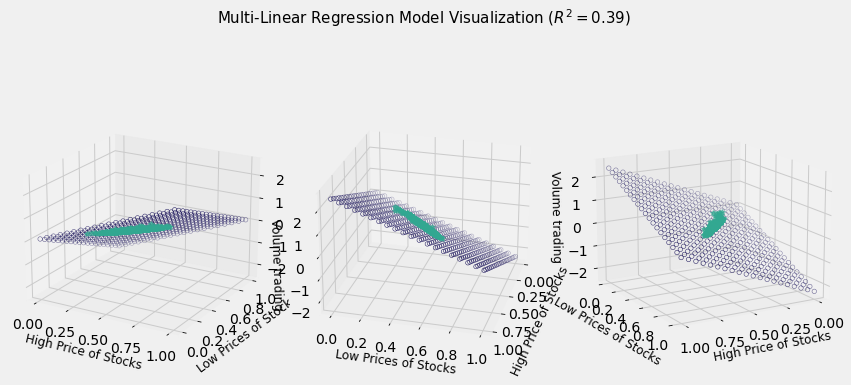

In [65]:
predicted = model.predict(model_viz)

# Evaluate model by using it's R^2 score 
r2 = model.score(X, Y)

# Plot model visualization
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='#32a891', zorder=15, linestyle='-', marker='*', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#150e57')
    ax.set_xlabel('High Price of Stocks', fontsize=12)
    ax.set_ylabel('Low Prices of Stocks', fontsize=12)
    ax.set_zlabel('Volume trading ', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

    


ax1.view_init(elev=20, azim=-60)
ax2.view_init(elev=25, azim=15)
ax3.view_init(elev=15, azim=60)

fig.suptitle('Multi-Linear Regression Model Visualization ($R^2 = %.2f$)' % r2, fontsize=15, color='k')

fig.tight_layout()




In [70]:
import seaborn as sns

## Corelation Matrix of Features i.e High And Low Prices of Stocks 

Pearson correlation coefficient matrix of each variables:
           Volume      High       Low
Volume  1.000000 -0.067484 -0.080078
High   -0.067484  1.000000  0.996762
Low    -0.080078  0.996762  1.000000


/var/folders/6t/j_pqygk907b8ckg3y8nwwydm0000gp/T/ipykernel_31456/2081916922.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


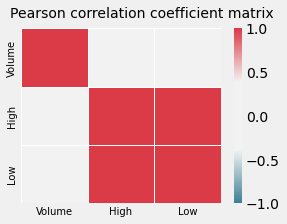

In [69]:
corr = Healthcare_df[['Volume', 'High', 'Low']].corr()
print('Pearson correlation coefficient matrix of each variables:\n', corr)

# Generate a mask for the diagonal cell
mask = np.zeros_like(corr, dtype=np.bool)
#np.fill_diagonal(mask, val=True)

# Initialize matplotlib figure
fig, ax = plt.subplots(figsize=(4, 3))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)
cmap.set_bad('grey')

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)
fig.suptitle('Pearson correlation coefficient matrix', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)
# fig.tight_layout()